In [89]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [90]:
data = pd.read_excel('..\\data\\preprocessed\\data5.xlsx')

In [91]:
data

,Announced Date,Industry Groups Similarity,Industries Similarity,Location Similarity,EE_Organization Name,EE_Founded Date,EE_Age,EE_Industry Groups,EE_Industries,EE_Headquarters Location,...,ER_Number of Articles,ER_Active Tech Count,ER_Patents Granted,ER_Trademarks Registered,ER_Total Products Active,ER_IT Spend Currency (in USD),ER_Estimated Revenue Range,ER_Number of Funding Rounds,ER_Total Funding Amount Currency (in USD),ER_Number of Investors
0,2011,1.000000,0.200000,0.00,Unified Dispatch,2001,10,"Mobile, Transportation","Automotive, Car Sharing, Mobile","Pasadena, California, United States",...,85,111,1,24,31,0,5000,1,0,2
1,2011,0.125000,0.000000,0.50,iVisit,2006,5,"Hardware, Information Technology, Internet Ser...","Messaging, Software, Video Conferencing","Santa Monica, California, United States",...,127,43,27,3,21,71149,300,2,140000000,1
2,2011,0.250000,0.100000,0.50,Bring Light,2006,5,"Community and Lifestyle, Internet Services, Other","Non Profit, Social, Social Network","Cupertino, California, United States",...,17,40,0,0,0,0,25,3,10500000,22
3,2011,0.333333,0.222222,0.50,nuBridges,2001,10,"Hardware, Privacy and Security, Professional S...","Compliance, Data Storage, Security, Software","Atlanta, Georgia, United States",...,40,29,6,43,38,0,300,4,45727627,1
4,2011,0.142857,0.000000,0.20,ibeatyou,2007,4,"Internet Services, Media and Entertainment, Video","Internet, Online Portals, Video","Santa Monica, California, United States",...,1119,22,12,9,53,0,75,12,49106783,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,2021,0.500000,0.400000,0.00,Beach Bum,2015,6,"Gaming, Software","Casual Games, Online Games, Software, Video Games","Ra'anana, HaMerkaz, Israel",...,11,50,0,1,25,0,300,6,516851844,7
11066,2021,1.000000,0.400000,0.20,Habitu8,2017,4,"Information Technology, Privacy and Security, ...","Cyber Security, Security, Software","Torrance, California, United States",...,42,60,1,6,41,457832,300,7,498200000,14
11067,2021,0.333333,0.000000,0.00,Uncanny Vision,2012,9,"Administrative Services, Artificial Intelligen...","Artificial Intelligence, Computer Vision, Imag...","Bangalore, Karnataka, India",...,60,15,15,1,25,0,5,4,95000000,3
11068,2021,0.250000,0.000000,0.00,Restorepoint,2008,13,"Hardware, Information Technology, Privacy and ...","Data Center Automation, Enterprise Software, N...","Woking, Surrey, United Kingdom",...,92,91,16,5,45,6166194,300,6,214000000,7


In [92]:
# 비율
data['Diff Age'] = (data['ER_Age']+0.0001)/(data['EE_Age']+0.0001)
data['Number of Founders'] = (data['ER_Number of Founders']+0.0001)/(data['EE_Number of Founders']+0.0001)
data['Number of Employees'] = (data['ER_Number of Employees']+0.0001)/(data['EE_Number of Employees']+0.0001)
data['Number of Articles'] = (data['ER_Number of Articles']+0.0001)/(data['EE_Number of Articles']+0.0001)
data['Active Tech Count'] = (data['ER_Active Tech Count']+0.0001)/(data['EE_Active Tech Count']+0.0001)
data['Patents Granted'] = (data['ER_Patents Granted']+0.0001)/(data['EE_Patents Granted']+0.0001)
data['Trademarks Registered'] = (data['ER_Trademarks Registered']+0.0001)/(data['EE_Trademarks Registered']+0.0001)
data['Total Products Active'] = (data['ER_Total Products Active']+0.0001)/(data['EE_Total Products Active']+0.0001)
data['IT Spend'] = (data['ER_IT Spend Currency (in USD)']+0.0001)/(data['EE_IT Spend Currency (in USD)']+0.000001)
data['Estimated Revenue Range'] = (data['ER_Estimated Revenue Range']+0.0001)/(data['EE_Estimated Revenue Range']+0.0001)
data['Number of Funding Rounds'] = (data['ER_Number of Funding Rounds']+0.0001)/(data['EE_Number of Funding Rounds']+0.0001)
data['Total Funding Amount'] = (data['ER_Total Funding Amount Currency (in USD)']+0.0001)/(data['EE_Total Funding Amount Currency (in USD)']+0.0001)
data['Number of Investors'] = (data['ER_Number of Investors']+0.0001)/(data['EE_Number of Investors']+0.0001)

In [93]:
# 기술적인 변수
## 두 기업의 특허와 상표 수 평균의 비율
data['Diff_Tech'] = (((data['ER_Patents Granted']+data['ER_Trademarks Registered'])/2)+0.0001) / (((data['EE_Patents Granted']+data['EE_Trademarks Registered'])/2)+0.0001) 

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Announced Date                             11070 non-null  int64  
 1   Industry Groups Similarity                 11070 non-null  float64
 2   Industries Similarity                      11070 non-null  float64
 3   Location Similarity                        11070 non-null  float64
 4   EE_Organization Name                       11070 non-null  object 
 5   EE_Founded Date                            11070 non-null  int64  
 6   EE_Age                                     11070 non-null  int64  
 7   EE_Industry Groups                         11070 non-null  object 
 8   EE_Industries                              11070 non-null  object 
 9   EE_Headquarters Location                   11070 non-null  object 
 10  EE_Number of Founders 

In [95]:
data.columns = ['Announced_Date', 'Industry_Groups_Similarity', 'Industries_Similarity', 'Location_Similarity', 
                'EE_Name', 'EE_Founded_Date', 'EE_Age', 'EE_Industry Groups', 'EE_Industries', 'EE_Headquarters_Location',
                'EE_Number_of_Founders', 'EE_Number_of_Employees', 'EE_Number_of_Articles', 'EE_Active_Tech_Count', 
                'EE_Patents_Granted', 'EE_Trademarks_Registered', 'EE_Total_Products_Active', 'EE_IT_Spend', 
                'EE_Estimated_Revenue_Range', 'EE_Number_of_Funding_Rounds', 'EE_Total_Funding_Amount', 'EE_Number_of_Investors',
                'ER_Name', 'ER_Founded_Date', 'ER_Age', 'ER_Industry Groups', 'ER_Industries', 'ER_Headquarters_Location',
                'ER_Number_of_Founders', 'ER_Number_of_Employees', 'ER_Number_of_Articles', 'ER_Active_Tech_Count', 
                'ER_Patents_Granted', 'ER_Trademarks_Registered', 'ER_Total_Products_Active', 'ER_IT_Spend', 
                'ER_Estimated_Revenue_Range', 'ER_Number_of_Funding_Rounds', 'ER_Total_Funding_Amount', 'ER_Number_of_Investors',
                'Diff_Age', 'Diff_NFounders', 'Diff_NEmployees', 'Diff_NArticles', 'Diff_NTech', 'Diff_NPatents',
                'Diff_NTrademarks', 'Diff_NProducts', 'Diff_IT_Spend', 'Diff_ERR', 'Diff_NFunding',
                'Diff_Funding_Amount', 'Diff_NInvestors', 'Diff_Infra']

In [96]:
C_data = data[['Industry_Groups_Similarity', 'Location_Similarity', 'Diff_Age', 'Diff_Infra', 'Diff_ERR']]

In [97]:
scaler = StandardScaler()

In [98]:
scaled_df = pd.DataFrame(data = scaler.fit_transform(C_data), columns=C_data.columns)

scaled_df.describe()

,Industry_Groups_Similarity,Location_Similarity,Diff_Age,Diff_Infra,Diff_ERR
count,1.107000e+04,1.107000e+04,1.107000e+04,1.107000e+04,1.107000e+04
mean,6.104923e-16,6.064260e-15,4.015256e-16,5.594290e-16,5.285115e-15
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-1.361768e+00,-9.022966e-01,-6.980395e-02,-1.024674e-01,-2.279044e-01
25%,-7.102459e-01,-9.022966e-01,-6.965832e-02,-1.024672e-01,-2.279043e-01
50%,-5.872407e-02,-3.097375e-01,-6.956123e-02,-1.024566e-01,-2.278798e-01
75%,5.927977e-01,5.791012e-01,-6.938323e-02,-9.434198e-02,-2.074294e-01
max,2.547363e+00,2.060499e+00,3.682526e+01,3.434852e+01,7.962050e+00


In [99]:
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('silhoutte')
    plt.show()

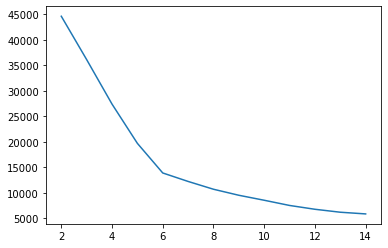

In [100]:
# K-Means
inertia1=[]
for n_cls in range(2,15):
    kmeans = KMeans(n_clusters=n_cls)
    kmeans.fit(scaled_df)
    inertia1.append(kmeans.inertia_)
    
plt.plot(range(2,15), inertia1)    # elbow 확인

In [101]:
kmeans=KMeans(n_clusters=6)
kmeans_label=kmeans.fit_predict(scaled_df)

In [102]:
silhouette_score(scaled_df, kmeans_label)

0.46903971096121383

In [103]:
collections.Counter(kmeans_label)

Counter({4: 387, 0: 6157, 3: 2707, 1: 1717, 2: 54, 5: 48})

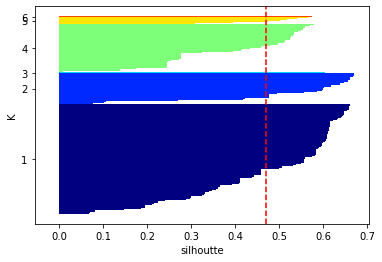

In [104]:
plotSilhouette(scaled_df, kmeans_label)

In [74]:
# Agglomerative
aggl=AgglomerativeClustering(n_clusters=6)
aggl.fit(scaled_df)
aggl_label=aggl.labels_

In [75]:
silhouette_score(scaled_df, aggl_label)

0.4645595016784903

In [76]:
collections.Counter(aggl_label)

Counter({4: 384, 0: 7464, 3: 1640, 5: 1489, 1: 54, 2: 39})

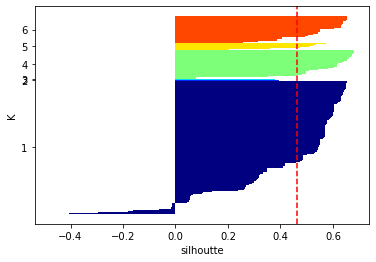

In [77]:
plotSilhouette(scaled_df, aggl_label)

In [78]:
# MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(scaled_df, quantile=0.25)
print("최적의 bandwidth 값:", round(bandwidth, 3))

최적의 bandwidth 값: 1.444


In [79]:
MS=MeanShift(bandwidth=1.444)
MS_label=MS.fit_predict(scaled_df)

In [80]:
silhouette_score(scaled_df, MS_label)

0.4016502173200638

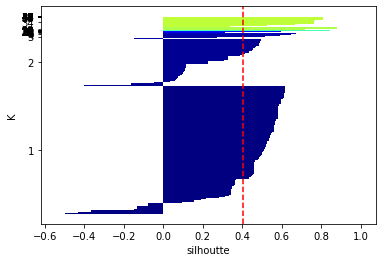

In [81]:
plotSilhouette(scaled_df, MS_label)

In [82]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=200, metric='euclidean')
dbscan_label = dbscan.fit_predict(scaled_df)

In [83]:
silhouette_score(scaled_df, dbscan_label)

0.20341830204004555

In [84]:
collections.Counter(dbscan_label)

Counter({-1: 827, 0: 5589, 1: 3166, 2: 1488})

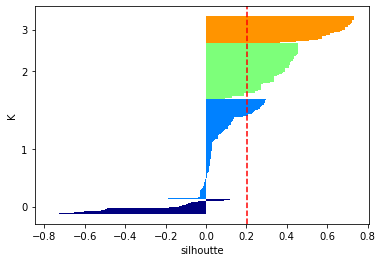

In [85]:
plotSilhouette(scaled_df, dbscan_label)

In [86]:
# GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
gmm_label = gmm.fit_predict(scaled_df)

In [87]:
silhouette_score(scaled_df, gmm_label)

0.3039074212674275

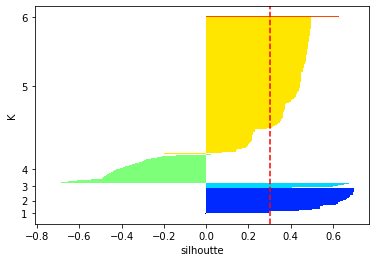

In [88]:
plotSilhouette(scaled_df, gmm_label)

In [112]:
#변수별 시각화 - kmeans 기준
data['label'] = kmeans_label

In [113]:
data['label'].value_counts()

0    6157
3    2707
1    1717
4     387
2      54
5      48
Name: label, dtype: int64

In [142]:
data

,Announced_Date,Industry_Groups_Similarity,Industries_Similarity,Location_Similarity,EE_Name,EE_Founded_Date,EE_Age,EE_Industry Groups,EE_Industries,EE_Headquarters_Location,...,Diff_NPatents,Diff_NTrademarks,Diff_NProducts,Diff_IT_Spend,Diff_ERR,Diff_NFunding,Diff_Funding_Amount,Diff_NInvestors,Diff_Infra,label
0,2011,1.000000,0.200000,0.000000,Unified Dispatch,2001,10,"Mobile, Transportation","Automotive, Car Sharing, Mobile","Pasadena, California, United States",...,1.000000,240001.000000,310001.000000,100.000000,50000001.000000,1.000000,1.000000,1.999900,24.995201,4
1,2011,0.125000,0.000000,0.500000,iVisit,2006,5,"Hardware, Information Technology, Internet Ser...","Messaging, Software, Video Conferencing","Santa Monica, California, United States",...,270001.000000,1.499975,210001.000000,71149000100.000015,3000001.000000,20001.000000,1400000000000.999756,10001.000000,14.998600,0
2,2011,0.250000,0.100000,0.500000,Bring Light,2006,5,"Community and Lifestyle, Internet Services, Other","Non Profit, Social, Social Network","Cupertino, California, United States",...,1.000000,1.000000,0.000020,100.000000,250001.000000,2.999800,105000000001.000000,10.999500,1.000000,0
3,2011,0.333333,0.222222,0.500000,nuBridges,2001,10,"Hardware, Privacy and Security, Professional S...","Compliance, Data Storage, Security, Software","Atlanta, Georgia, United States",...,60001.000000,430001.000000,380001.000000,100.000000,3000001.000000,3.999700,8.314114,1.000000,245001.000000,0
4,2011,0.142857,0.000000,0.200000,ibeatyou,2007,4,"Internet Services, Media and Entertainment, Video","Internet, Online Portals, Video","Santa Monica, California, United States",...,120001.000000,90001.000000,5.888835,100.000000,750001.000000,5.999750,49.106783,2.999933,105001.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,2021,0.500000,0.400000,0.000000,Beach Bum,2015,6,"Gaming, Software","Casual Games, Online Games, Software, Video Games","Ra'anana, HaMerkaz, Israel",...,1.000000,0.200016,250001.000000,100.000000,3000001.000000,60001.000000,5168518440001.000000,70001.000000,0.200032,3
11066,2021,1.000000,0.400000,0.200000,Habitu8,2017,4,"Information Technology, Privacy and Security, ...","Cyber Security, Security, Software","Torrance, California, United States",...,10001.000000,1.499988,1.708330,457832000100.000000,3000001.000000,2.333289,4982000000001.000000,4.666544,1.749963,3
11067,2021,0.333333,0.000000,0.000000,Uncanny Vision,2012,9,"Administrative Services, Artificial Intelligen...","Artificial Intelligence, Computer Vision, Imag...","Bangalore, Karnataka, India",...,150001.000000,10001.000000,1.923070,100.000000,4.999600,1.999950,950000000001.000000,1.499975,80001.000000,0
11068,2021,0.250000,0.000000,0.000000,Restorepoint,2008,13,"Hardware, Information Technology, Privacy and ...","Data Center Automation, Enterprise Software, N...","Woking, Surrey, United Kingdom",...,160001.000000,50001.000000,2.999987,6166194000100.000000,59.998820,60001.000000,2140000000000.999756,70001.000000,105001.000000,0


In [143]:
data.to_excel('..\\data\\result\\clustering_final.xlsx', index=False)

In [116]:
formula = 'label ~ Industry_Groups_Similarity+Industries_Similarity+Location_Similarity+EE_Age+EE_Number_of_Founders+EE_Number_of_Employees+EE_Number_of_Articles+EE_Active_Tech_Count+EE_Patents_Granted+EE_Trademarks_Registered+EE_Total_Products_Active+EE_IT_Spend+EE_Estimated_Revenue_Range+EE_Number_of_Funding_Rounds+EE_Total_Funding_Amount+EE_Number_of_Investors+ER_Age+ER_Number_of_Founders+ER_Number_of_Employees+ER_Number_of_Articles+ER_Active_Tech_Count+ER_Patents_Granted+ER_Trademarks_Registered+ER_Total_Products_Active+ER_IT_Spend+ER_Estimated_Revenue_Range+ER_Number_of_Funding_Rounds+ER_Total_Funding_Amount+ER_Number_of_Investors+Diff_Age+Diff_NFounders+Diff_NEmployees+Diff_NArticles+Diff_NTech+Diff_NPatents+Diff_NTrademarks+Diff_NProducts+Diff_IT_Spend+Diff_Infra+Diff_ERR+Diff_NFunding+Diff_Funding_Amount+Diff_NInvestors'

In [117]:
pd.options.display.float_format = '{:.6f}'.format
#pd.reset_option('display.float_format')

In [118]:
lm = ols(formula, data).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
Industry_Groups_Similarity,1.000000,8374.414608,8374.414608,10498.732318,0.000000
Industries_Similarity,1.000000,53.972169,53.972169,67.663160,0.000000
Location_Similarity,1.000000,35.369404,35.369404,44.341476,0.000000
EE_Age,1.000000,23.057858,23.057858,28.906890,0.000000
EE_Number_of_Founders,1.000000,4.318449,4.318449,5.413900,0.019995
EE_Number_of_Employees,1.000000,28.420195,28.420195,35.629477,0.000000
EE_Number_of_Articles,1.000000,0.194828,0.194828,0.244250,0.621163
EE_Active_Tech_Count,1.000000,13.029271,13.029271,16.334375,0.000053
EE_Patents_Granted,1.000000,0.043182,0.043182,0.054136,0.816021
EE_Trademarks_Registered,1.000000,1.266808,1.266808,1.588157,0.207616


In [119]:
cluster0 = data.loc[data['label']==0, :]
cluster1 = data.loc[data['label']==1, :]
cluster2 = data.loc[data['label']==2, :]
cluster3 = data.loc[data['label']==3, :]
cluster4 = data.loc[data['label']==4, :]
cluster5 = data.loc[data['label']==5, :]

In [120]:
print('0:',round(cluster0['Industry_Groups_Similarity'].mean(),6))
print('1:',round(cluster1['Industry_Groups_Similarity'].mean(),6))
print('2:',round(cluster2['Industry_Groups_Similarity'].mean(),6))
print('3:',round(cluster3['Industry_Groups_Similarity'].mean(),6))
print('4:',round(cluster4['Industry_Groups_Similarity'].mean(),6))
print('5:',round(cluster5['Industry_Groups_Similarity'].mean(),6))

0: 0.215475
1: 0.340812
2: 0.241983
3: 0.665456
4: 0.296574
5: 0.316948


In [123]:
print('0:',round(cluster0['Industries_Similarity'].mean(),6))
print('1:',round(cluster1['Industries_Similarity'].mean(),6))
print('2:',round(cluster2['Industries_Similarity'].mean(),6))
print('3:',round(cluster3['Industries_Similarity'].mean(),6))
print('4:',round(cluster4['Industries_Similarity'].mean(),6))
print('5:',round(cluster5['Industries_Similarity'].mean(),6))

0: 0.11648
1: 0.183141
2: 0.084385
3: 0.321424
4: 0.127865
5: 0.135475


In [124]:
print('0:',round(cluster0['Location_Similarity'].mean(),6))
print('1:',round(cluster1['Location_Similarity'].mean(),6))
print('2:',round(cluster2['Location_Similarity'].mean(),6))
print('3:',round(cluster3['Location_Similarity'].mean(),6))
print('4:',round(cluster4['Location_Similarity'].mean(),6))
print('5:',round(cluster5['Location_Similarity'].mean(),6))

0: 0.172384
1: 0.98641
2: 0.282407
3: 0.166273
4: 0.336606
5: 0.429861


In [125]:
print('0:',round(cluster0['Diff_Age'].mean(),6))
print('1:',round(cluster1['Diff_Age'].mean(),6))
print('2:',round(cluster2['Diff_Age'].mean(),6))
print('3:',round(cluster3['Diff_Age'].mean(),6))
print('4:',round(cluster4['Diff_Age'].mean(),6))
print('5:',round(cluster5['Diff_Age'].mean(),6))

0: 40.7154
1: 95.010541
2: 3.364489
3: 45.963096
4: 209.066414
5: 70001.0


In [126]:
print('0:',round(cluster0['Diff_NEmployees'].mean(),6))
print('1:',round(cluster1['Diff_NEmployees'].mean(),6))
print('2:',round(cluster2['Diff_NEmployees'].mean(),6))
print('3:',round(cluster3['Diff_NEmployees'].mean(),6))
print('4:',round(cluster4['Diff_NEmployees'].mean(),6))
print('5:',round(cluster5['Diff_NEmployees'].mean(),6))

0: 66.218597
1: 71.540821
2: 1040.855382
3: 49.220549
4: 476.091369
5: 88.399418


In [127]:
print('0:',round(cluster0['Diff_NArticles'].mean(),6))
print('1:',round(cluster1['Diff_NArticles'].mean(),6))
print('2:',round(cluster2['Diff_NArticles'].mean(),6))
print('3:',round(cluster3['Diff_NArticles'].mean(),6))
print('4:',round(cluster4['Diff_NArticles'].mean(),6))
print('5:',round(cluster5['Diff_NArticles'].mean(),6))

0: 546542.125421
1: 833893.941678
2: 15866999.38657
3: 274026.020831
4: 14541889.660079
5: 2442453.258716


In [128]:
print('0:',round(cluster0['Diff_NPatents'].mean(),6))
print('1:',round(cluster1['Diff_NPatents'].mean(),6))
print('2:',round(cluster2['Diff_NPatents'].mean(),6))
print('3:',round(cluster3['Diff_NPatents'].mean(),6))
print('4:',round(cluster4['Diff_NPatents'].mean(),6))
print('5:',round(cluster5['Diff_NPatents'].mean(),6))

0: 398017.094896
1: 505792.61609
2: 108174815.814815
3: 471220.665095
4: 5322299.162649
5: 619167.711307


In [129]:
print('0:',round(cluster0['Diff_ERR'].mean(),6))
print('1:',round(cluster1['Diff_ERR'].mean(),6))
print('2:',round(cluster2['Diff_ERR'].mean(),6))
print('3:',round(cluster3['Diff_ERR'].mean(),6))
print('4:',round(cluster4['Diff_ERR'].mean(),6))
print('5:',round(cluster5['Diff_ERR'].mean(),6))

0: 497950.11809
1: 499469.319607
2: 61125689.850788
3: 456206.950301
4: 56976745.186047
5: 6158751.208324


In [130]:
print('0:',round(cluster0['Diff_Funding_Amount'].mean(),6))
print('1:',round(cluster1['Diff_Funding_Amount'].mean(),6))
print('2:',round(cluster2['Diff_Funding_Amount'].mean(),6))
print('3:',round(cluster3['Diff_Funding_Amount'].mean(),6))
print('4:',round(cluster4['Diff_Funding_Amount'].mean(),6))
print('5:',round(cluster5['Diff_Funding_Amount'].mean(),6))

0: 1116840227471.7412
1: 1356322136851.2837
2: 78369121242271.69
3: 877796823957.3136
4: 9574810557103.303
5: 7149389423637.558


In [131]:
print('0:',round(cluster0['EE_Age'].mean(),6))
print('1:',round(cluster1['EE_Age'].mean(),6))
print('2:',round(cluster2['EE_Age'].mean(),6))
print('3:',round(cluster3['EE_Age'].mean(),6))
print('4:',round(cluster4['EE_Age'].mean(),6))
print('5:',round(cluster5['EE_Age'].mean(),6))

0: 7.247848
1: 5.649388
2: 5.259259
3: 7.534171
4: 6.356589
5: 0.0


In [132]:
print('0:',round(cluster0['EE_Number_of_Employees'].mean(),6))
print('1:',round(cluster1['EE_Number_of_Employees'].mean(),6))
print('2:',round(cluster2['EE_Number_of_Employees'].mean(),6))
print('3:',round(cluster3['EE_Number_of_Employees'].mean(),6))
print('4:',round(cluster4['EE_Number_of_Employees'].mean(),6))
print('5:',round(cluster5['EE_Number_of_Employees'].mean(),6))

0: 153.673055
1: 155.320326
2: 617.777778
3: 184.918729
4: 418.320413
5: 388.75


In [133]:
print('0:',round(cluster0['EE_Active_Tech_Count'].mean(),6))
print('1:',round(cluster1['EE_Active_Tech_Count'].mean(),6))
print('2:',round(cluster2['EE_Active_Tech_Count'].mean(),6))
print('3:',round(cluster3['EE_Active_Tech_Count'].mean(),6))
print('4:',round(cluster4['EE_Active_Tech_Count'].mean(),6))
print('5:',round(cluster5['EE_Active_Tech_Count'].mean(),6))

0: 25.701965
1: 23.313337
2: 17.12963
3: 24.422977
4: 17.338501
5: 21.791667


In [134]:
print('0:',round(cluster0['EE_Number_of_Funding_Rounds'].mean(),6))
print('1:',round(cluster1['EE_Number_of_Funding_Rounds'].mean(),6))
print('2:',round(cluster2['EE_Number_of_Funding_Rounds'].mean(),6))
print('3:',round(cluster3['EE_Number_of_Funding_Rounds'].mean(),6))
print('4:',round(cluster4['EE_Number_of_Funding_Rounds'].mean(),6))
print('5:',round(cluster5['EE_Number_of_Funding_Rounds'].mean(),6))

0: 1.690758
1: 1.752475
2: 1.592593
3: 1.917252
4: 1.067183
5: 0.770833


In [135]:
print('0:',round(cluster0['ER_Number_of_Employees'].mean(),6))
print('1:',round(cluster1['ER_Number_of_Employees'].mean(),6))
print('2:',round(cluster2['ER_Number_of_Employees'].mean(),6))
print('3:',round(cluster3['ER_Number_of_Employees'].mean(),6))
print('4:',round(cluster4['ER_Number_of_Employees'].mean(),6))
print('5:',round(cluster5['ER_Number_of_Employees'].mean(),6))

0: 1335.488062
1: 1139.280722
2: 9815.37037
3: 1205.487625
4: 6695.465116
5: 1609.166667


In [136]:
print('0:',round(cluster0['ER_Number_of_Articles'].mean(),6))
print('1:',round(cluster1['ER_Number_of_Articles'].mean(),6))
print('2:',round(cluster2['ER_Number_of_Articles'].mean(),6))
print('3:',round(cluster3['ER_Number_of_Articles'].mean(),6))
print('4:',round(cluster4['ER_Number_of_Articles'].mean(),6))
print('5:',round(cluster5['ER_Number_of_Articles'].mean(),6))

0: 670.545071
1: 914.94933
2: 31691.055556
3: 369.78611
4: 8041.542636
5: 2200.166667


In [137]:
print('0:',round(cluster0['ER_Patents_Granted'].mean(),6))
print('1:',round(cluster1['ER_Patents_Granted'].mean(),6))
print('2:',round(cluster2['ER_Patents_Granted'].mean(),6))
print('3:',round(cluster3['ER_Patents_Granted'].mean(),6))
print('4:',round(cluster4['ER_Patents_Granted'].mean(),6))
print('5:',round(cluster5['ER_Patents_Granted'].mean(),6))

0: 92.010232
1: 61.892836
2: 10817.481481
3: 70.219431
4: 701.235142
5: 62.270833


In [138]:
print('0:',round(cluster0['ER_Trademarks_Registered'].mean(),6))
print('1:',round(cluster1['ER_Trademarks_Registered'].mean(),6))
print('2:',round(cluster2['ER_Trademarks_Registered'].mean(),6))
print('3:',round(cluster3['ER_Trademarks_Registered'].mean(),6))
print('4:',round(cluster4['ER_Trademarks_Registered'].mean(),6))
print('5:',round(cluster5['ER_Trademarks_Registered'].mean(),6))

0: 16.957772
1: 11.635993
2: 453.592593
3: 18.673809
4: 70.70801
5: 14.958333


In [139]:
print('0:',round(cluster0['ER_IT_Spend'].mean(),6))
print('1:',round(cluster1['ER_IT_Spend'].mean(),6))
print('2:',round(cluster2['ER_IT_Spend'].mean(),6))
print('3:',round(cluster3['ER_IT_Spend'].mean(),6))
print('4:',round(cluster4['ER_IT_Spend'].mean(),6))
print('5:',round(cluster5['ER_IT_Spend'].mean(),6))

0: 4038291.100861
1: 3180760.329062
2: 64661504.185185
3: 3904689.059106
4: 10238963.565891
5: 8616086.666667


In [140]:
print('0:',round(cluster0['ER_Estimated_Revenue_Range'].mean(),6))
print('1:',round(cluster1['ER_Estimated_Revenue_Range'].mean(),6))
print('2:',round(cluster2['ER_Estimated_Revenue_Range'].mean(),6))
print('3:',round(cluster3['ER_Estimated_Revenue_Range'].mean(),6))
print('4:',round(cluster4['ER_Estimated_Revenue_Range'].mean(),6))
print('5:',round(cluster5['ER_Estimated_Revenue_Range'].mean(),6))

0: 335.92269
1: 320.543972
2: 8242.592593
3: 248.27041
4: 5697.674419
5: 619.208333


In [141]:
print('0:',round(cluster0['ER_Total_Funding_Amount'].mean(),6))
print('1:',round(cluster1['ER_Total_Funding_Amount'].mean(),6))
print('2:',round(cluster2['ER_Total_Funding_Amount'].mean(),6))
print('3:',round(cluster3['ER_Total_Funding_Amount'].mean(),6))
print('4:',round(cluster4['ER_Total_Funding_Amount'].mean(),6))
print('5:',round(cluster5['ER_Total_Funding_Amount'].mean(),6))

0: 354259876.624005
1: 466852479.807804
2: 11721757074.666666
3: 283383441.68563
4: 2425363670.374677
5: 808958098.166667


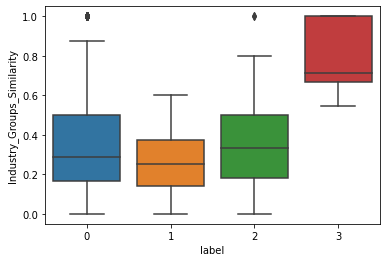

In [54]:
ax = sns.boxplot(data = data, x = 'label', y = 'Industry_Groups_Similarity')
#ax.set_ylim(0,1)

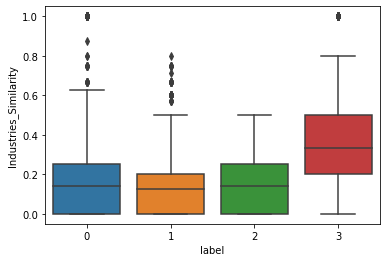

In [55]:
ax = sns.boxplot(data = data, x = 'label', y = 'Industries_Similarity')

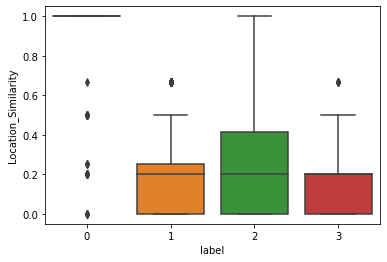

In [56]:
sns.boxplot(data = data, x = 'label', y = 'Location_Similarity')

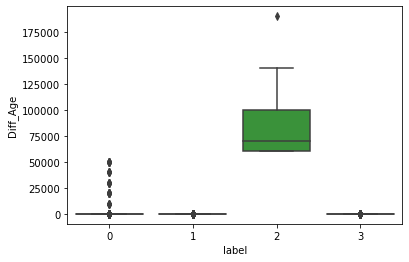

In [57]:
sns.boxplot(data = data, x = 'label', y = 'Diff_Age')

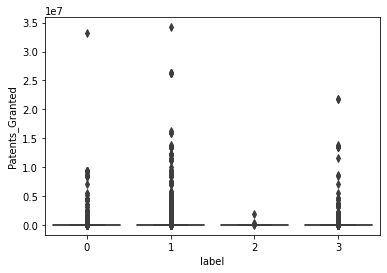

In [58]:
sns.boxplot(data = data, x = 'label', y = 'Patents_Granted')

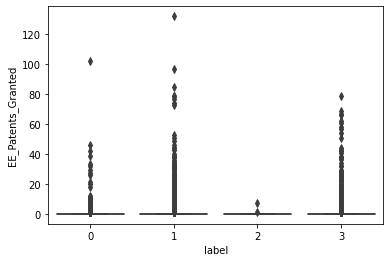

In [59]:
sns.boxplot(data = data, x = 'label', y = 'EE_Patents_Granted')

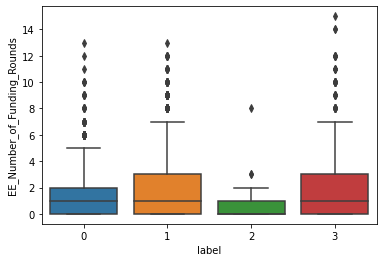

In [60]:
sns.boxplot(data = data, x = 'label', y = 'EE_Number_of_Funding_Rounds')

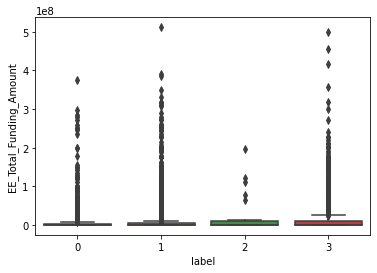

In [61]:
sns.boxplot(data = data, x = 'label', y = 'EE_Total_Funding_Amount')

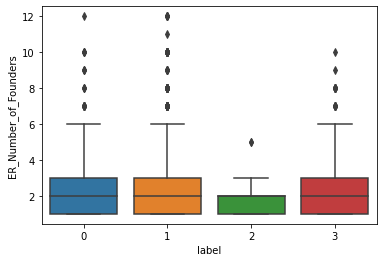

In [62]:
sns.boxplot(data = data, x = 'label', y = 'ER_Number_of_Founders')

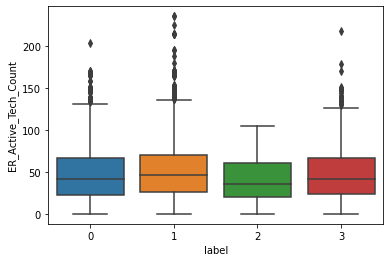

In [63]:
sns.boxplot(data = data, x = 'label', y = 'ER_Active_Tech_Count')

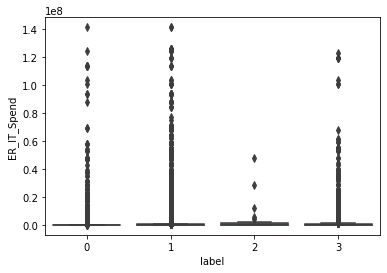

In [64]:
sns.boxplot(data = data, x = 'label', y = 'ER_IT_Spend')

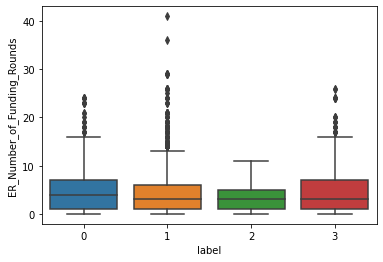

In [65]:
sns.boxplot(data = data, x = 'label', y = 'ER_Number_of_Funding_Rounds')